## 5.2 Sklearn 简介

先是sklearn的数据表示data representation， 然后是评估器API (Estimator APi)

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


*1.数据表 *

   上面的矩阵称为**样本**， 行数为**n_samples**

*2.特征矩阵*

   上面这个表也叫特征矩阵。

*3.目标数组*

   目标或者标签，简记为**y**，长度也是**n_smaple**。目标数组的特征通常是我们希望从数据中**预测的量化结果**，统计学的说法：y就是因变量。

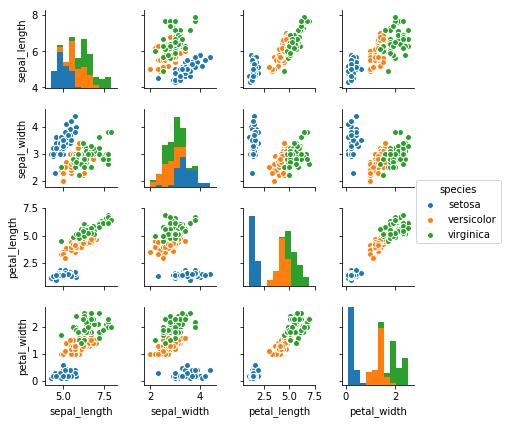

In [2]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', size = 1.5);

In [3]:
#提取特征矩阵和目标数组
X_iris = iris.drop('species', axis= 1)
X_iris.shape

(150, 4)

In [5]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y_iris = iris['species']

In [8]:
y_iris.shape

(150,)

### 5.2.2 sklearn 评估器API

有监督学习模型中，通常使用predict()预测新数据的标签0。


无监督学习中tranform()或者predict()方法转换或推断数据性质。

#### 有监督学习demo:线性回归

In [9]:
import matplotlib.pyplot as plt
import numpy as np

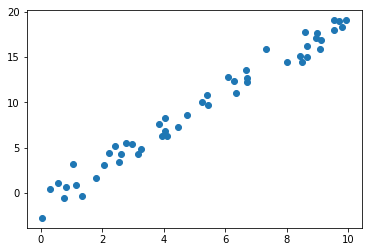

In [16]:
rng = np.random.RandomState(43)
x = 10 * rng.rand(50)
y = 2 * x  - 1 +rng.randn(50)
plt.scatter(x,y);

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
X =  x[:, np.newaxis]
print(x)# 50个随机数
print(x.shape)

[1.15054566 6.09066539 1.33390964 2.4058962  3.27139056 8.59137491
 6.66090213 5.41162212 0.29013824 7.33748296 3.94950018 8.02047119
 2.54421126 0.56884937 8.66648641 2.21028996 4.04989448 3.16096471
 0.766627   8.43224694 8.48939148 9.71465091 3.85376914 9.54488125
 4.45758361 6.69724652 0.8250005  8.9709858  2.98003501 2.62304823
 0.05129549 5.43202515 4.75596367 6.36373678 9.78204134 9.08662758
 9.10153076 5.25255671 1.0401895  1.80914595 9.53040221 4.11952983
 8.65017121 6.72177279 6.28785796 2.75558777 8.9674727  2.06891371
 4.04405243 9.93572492]
(50,)


In [21]:
X

array([[1.15054566],
       [6.09066539],
       [1.33390964],
       [2.4058962 ],
       [3.27139056],
       [8.59137491],
       [6.66090213],
       [5.41162212],
       [0.29013824],
       [7.33748296],
       [3.94950018],
       [8.02047119],
       [2.54421126],
       [0.56884937],
       [8.66648641],
       [2.21028996],
       [4.04989448],
       [3.16096471],
       [0.766627  ],
       [8.43224694],
       [8.48939148],
       [9.71465091],
       [3.85376914],
       [9.54488125],
       [4.45758361],
       [6.69724652],
       [0.8250005 ],
       [8.9709858 ],
       [2.98003501],
       [2.62304823],
       [0.05129549],
       [5.43202515],
       [4.75596367],
       [6.36373678],
       [9.78204134],
       [9.08662758],
       [9.10153076],
       [5.25255671],
       [1.0401895 ],
       [1.80914595],
       [9.53040221],
       [4.11952983],
       [8.65017121],
       [6.72177279],
       [6.28785796],
       [2.75558777],
       [8.9674727 ],
       [2.068

In [24]:
X.shape

(50, 1)

In [27]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model.coef_
#斜率

array([2.01683924])

In [29]:
model.intercept_
#截距

-1.0244613189684877

In [30]:
xfit = np.linspace(-1,11)

In [31]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

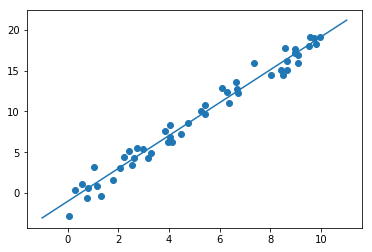

In [32]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

#### 3.有监督学习实例：鸢尾花数据集

In [33]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [35]:
#采用高斯朴素贝叶斯分类
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [36]:
from sklearn.metrics import  accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

#### 无监督学习demo 4.鸢尾花数据降维

In [37]:
#数据有四个维度 采用PCA来降维
from sklearn.decomposition import PCA  #1.选择模型类
model = PCA(n_components = 2) #2.设置超参数 初始化模型
model.fit(X_iris) # 3.拟合数据
X_2D = model.transform(X_iris) #4.数据转化为2维

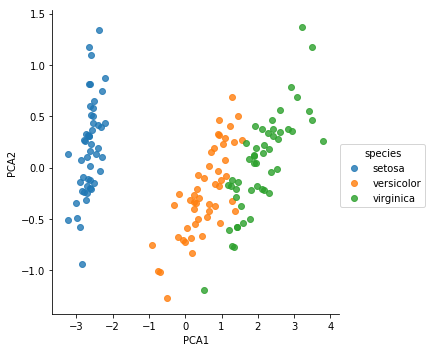

In [40]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot('PCA1','PCA2',hue = 'species', data = iris, fit_reg = False)

#### 无监督demo：iris data 聚类

In [43]:
#高斯混合模型Gaussian mixture model
from sklearn.mixture import GMM
model = GMM(n_components= 3, covariance_type = 'full') #超参数设置 初始化变量
model.fit(X_iris)
y_gmm = model.predict(X_iris)

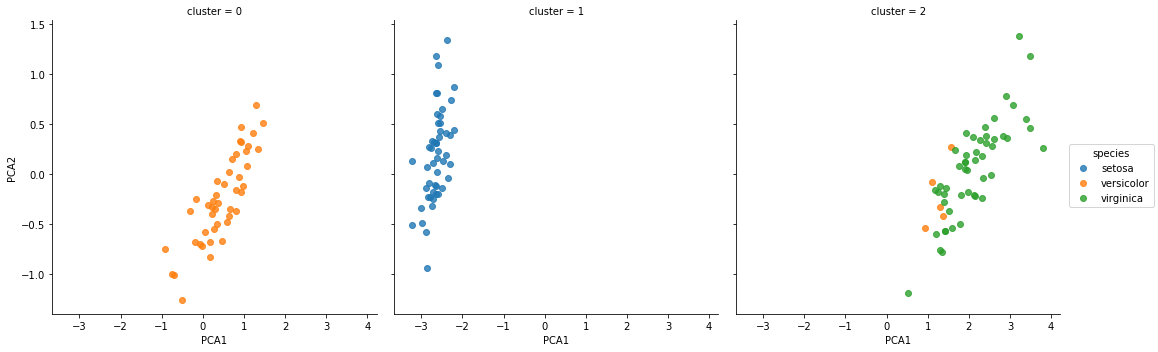

In [44]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2',hue = 'species', data = iris,col = 'cluster', fit_reg = False);

### 5.2.3 application：手写数字探索

#### 1.加载并可视化手写数字

In [45]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

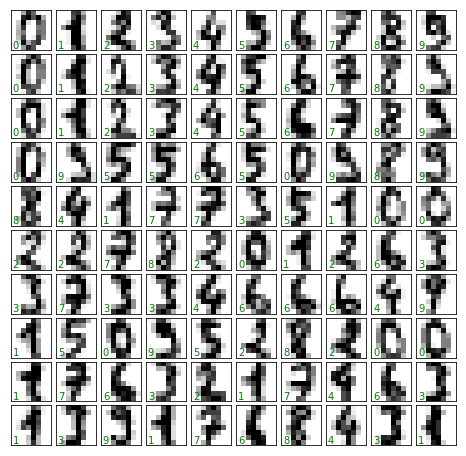

In [63]:
#解释一下：这是一个三维矩阵，1797个样本，每张图像是8*8像素。对前100进行可视化
import matplotlib.pyplot as plt

fig,axes = plt.subplots(10,10, figsize = (8,8),
                        subplot_kw={'xticks':[],'yticks':[]}, 
                        gridspec_kw=dict(hspace = 0.1,wspace = 0.1))

for i ,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
               transform = ax.transAxes, color ='green')